# Medical Data Analysis - Epilepsy(Case Study)

In [142]:
import pandas as pd
import numpy as np
import matplotlib as mp
import openpyxl

In [277]:
file_path = r'C:\Users\User\Desktop\epilepsy_data_case_study.xlsx'

In [278]:
df = pd.read_excel(file_path)

In [279]:
df

,Date,YEAR,Month,Day,Time of the Day,Length in(seconds),Number of seasures,Type,extra note,TOS
0,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
1,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
2,2021-12-05,2021,december,Sunday,daytime,60,1,absent seasure,0,0
3,2021-12-05,2021,december,Sunday,nighttime,60,1,absent seasure,0,0
4,2021-12-21,2021,december,Tuesday,nighttime,60,1,absent seasure,0,0
...,...,...,...,...,...,...,...,...,...,...
135,2023-07-08,2023,july,Monday,daytime,10,1,absent seasure,NaN,11:42pm
136,2023-07-13,2023,july,Thursday,daytime,10,1,absent seasure,NaN,4:07pm
137,2023-07-14,2023,july,Friday,nighttime,10,1,absent seasure,12:23am we did qec,12:23am
138,2023-07-19,2023,july,Wednesday,daytime,60,1,absent seasure,NaN,7:33pm


# Data Cleaning

Get rid of all seconds values in Length in seconds, 60s into 60

In [209]:
# Use pandas to read the XLS file and create a DataFrame
df = pd.read_excel(file_path)

In [88]:
# Replace 's' from the 'Length in(seconds)' column and convert the values to integers
#df['Length in(seconds)'] = df['Length in(seconds)'].str.replace('s', '').astype(int)

In [260]:
# Replace NaN values with 0 in the entire DataFrame
df_filled = df.fillna(0)

In [261]:
df_filled

,Date,YEAR,Month,Day,Time of the Day,Length in(seconds),Number of seasures,Type,extra note,TOS
0,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
1,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
2,2021-12-05,2021,december,Sunday,daytime,60,1,absent seasure,0,0
3,2021-12-05,2021,december,Sunday,nighttime,60,1,absent seasure,0,0
4,2021-12-21,2021,december,Tuesday,nighttime,60,1,absent seasure,0,0
...,...,...,...,...,...,...,...,...,...,...
135,2023-07-08,2023,july,Monday,daytime,10,1,absent seasure,0,11:42pm
136,2023-07-13,2023,july,Thursday,daytime,10,1,absent seasure,0,4:07pm
137,2023-07-14,2023,july,Friday,nighttime,10,1,absent seasure,12:23am we did qec,12:23am
138,2023-07-19,2023,july,Wednesday,daytime,60,1,absent seasure,0,7:33pm


# Get names of the days from date

In [149]:
from datetime import datetime

converting data about date into same data type

In [151]:
# Convert the 'Date' column to a consistent datetime format
df_filled['Date'] = pd.to_datetime(df_filled['Date'], errors='coerce')

In [ ]:
# Convert the 'Date' column to datetime format
df_filled['Date'] = pd.to_datetime(df_filled['Date'], format='%Y.%m.%d')

# Extract the day of the week and store it in the 'Day' column
df_filled['Day'] = df_filled['Date'].dt.day_name()

# Save the DataFrame back to a file (Excel format)
output_file_path = r'C:\Users\User\Desktop\epilepsy_data_case_study.xlsx'
df_filled.to_excel(output_file_path, index=False)

In [232]:
df_filled

,Date,YEAR,Month,Day,Time of the Day,Length in(seconds),Number of seasures,Type,extra note,TOS
0,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
1,2021-12-04,2021,december,Saturday,nighttime,60,1,absent seasure,0,0
2,2021-12-05,2021,december,Sunday,daytime,60,1,absent seasure,0,0
3,2021-12-05,2021,december,Sunday,nighttime,60,1,absent seasure,0,0
4,2021-12-21,2021,december,Tuesday,nighttime,60,1,absent seasure,0,0
...,...,...,...,...,...,...,...,...,...,...
135,2023-07-08,2023,july,Monday,daytime,10,1,absent seasure,11:42pm,4:07pm
136,2023-07-13,2023,july,Thursday,daytime,10,1,absent seasure,4:07pm,12:23am
137,2023-07-14,2023,july,Friday,nighttime,10,1,absent seasure,12:23am we did qec,7:33pm
138,2023-07-19,2023,july,Wednesday,daytime,60,1,absent seasure,7:33pm,8:37am


In [230]:
# Check the number of rows in the DataFrame
num_rows = df_filled.shape[0]

In [231]:
num_rows

140

# EDA - Exploratory Data Analysis

In [163]:
import matplotlib.pyplot as plt

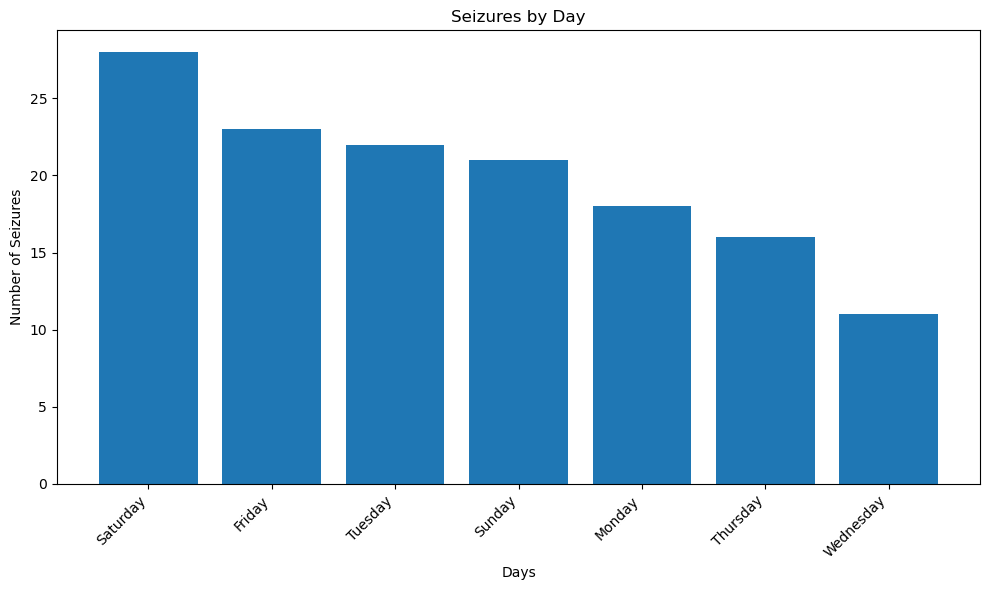

In [164]:
# Group the data by 'Day' and calculate the total number of seizures for each day
seizures_by_day = df_filled.groupby('Day')['Number of seasures'].sum().reset_index()

# Sort the data by the total number of seizures in descending order
seizures_by_day = seizures_by_day.sort_values(by='Number of seasures', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(seizures_by_day['Day'], seizures_by_day['Number of seasures'])
plt.xlabel('Days')
plt.ylabel('Number of Seizures')
plt.title('Seizures by Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

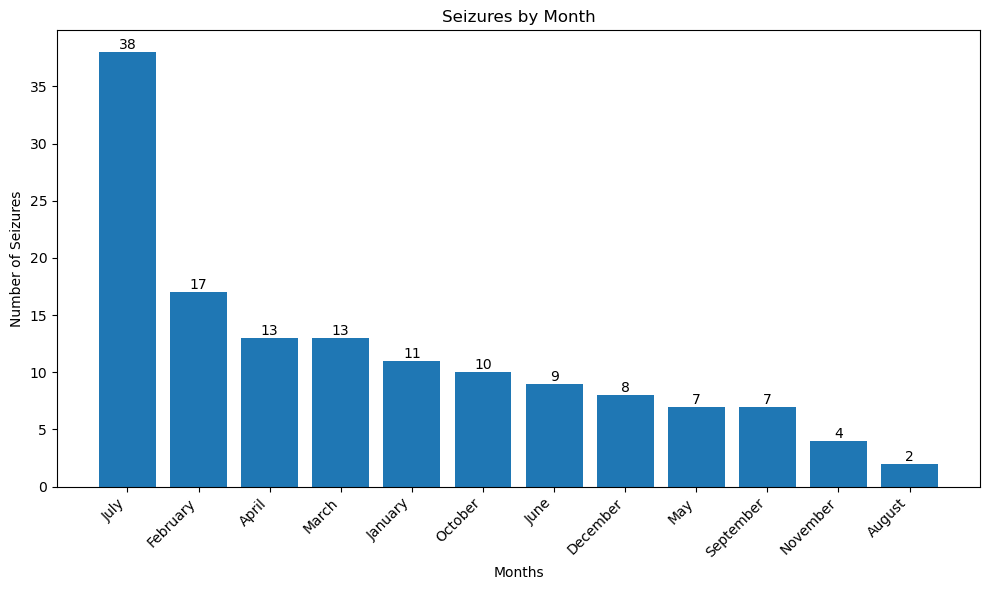

In [172]:

# Convert the 'Month' column to title case for better display (optional)
df_filled['Month'] = df_filled['Month'].str.title()

# Group the data by 'Month' and calculate the total number of seizures for each month
seizures_by_month = df_filled.groupby('Month')['Number of seasures'].sum().reset_index()

# Sort the data by the total number of seizures in descending order
seizures_by_month = seizures_by_month.sort_values(by='Number of seasures', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(seizures_by_month['Month'], seizures_by_month['Number of seasures'])
plt.xlabel('Months')
plt.ylabel('Number of Seizures')
plt.title('Seizures by Month')
plt.xticks(rotation=45, ha='right')

# Add annotations inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [173]:
# Calculate the average length of a seizure
average_seizure_length = df_filled['Length in(seconds)'].mean()

print("Average length of a seizure:", average_seizure_length, "seconds")

Average length of a seizure: 47.0863309352518 seconds


In [174]:
# Calculate the max length of a seizure
max_seizure_length = df_filled['Length in(seconds)'].max()

print("Average length of a seizure:", max_seizure_length, "seconds")

Average length of a seizure: 150 seconds


In [175]:
# Calculate the min length of a seizure
min_seizure_length = df_filled['Length in(seconds)'].min()

print("Average length of a seizure:", min_seizure_length, "seconds")

Average length of a seizure: 10 seconds


In [176]:
# Calculate the sum of all seizures
sum_of_seizures = df_filled['Number of seasures'].sum()

print("Sum of all seizures:", sum_of_seizures)

Sum of all seizures: 139


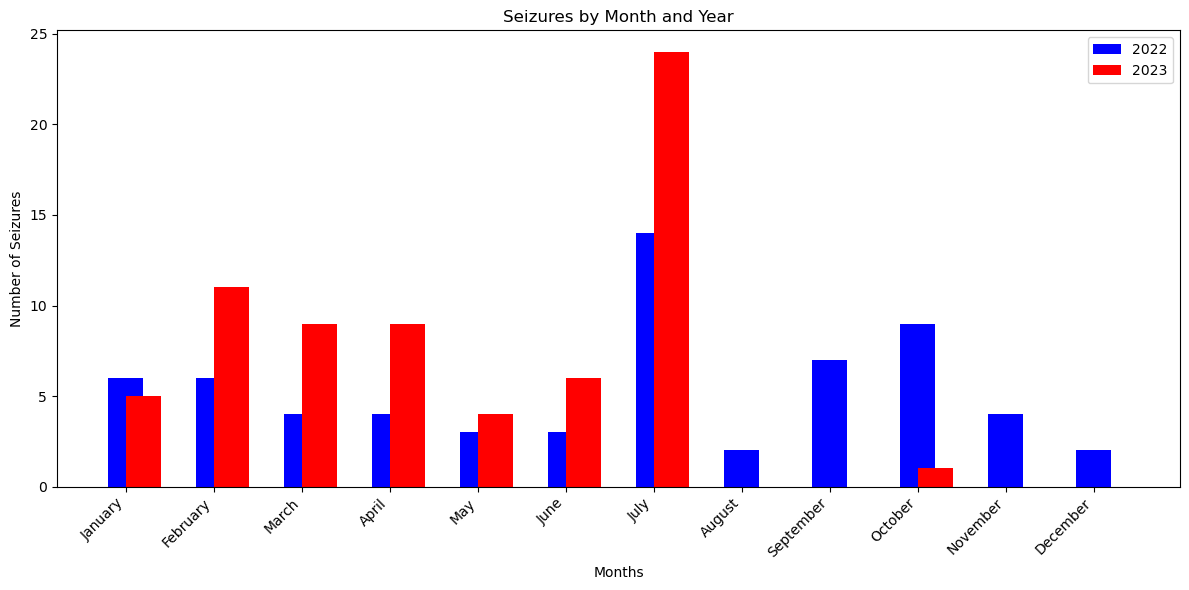

In [178]:
# Convert the 'Month' column to title case for better display (optional)
df_filled['Month'] = df_filled['Month'].str.title()

# Define the custom order of months
custom_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Filter data for year 2022 and 2023 separately
df_2022 = df_filled[df_filled['YEAR'] == 2022]
df_2023 = df_filled[df_filled['YEAR'] == 2023]

# Group data by 'Month' and calculate the number of seizures for each month in each year
seizures_2022 = df_2022.groupby('Month')['Number of seasures'].sum().reindex(custom_order, fill_value=0)
seizures_2023 = df_2023.groupby('Month')['Number of seasures'].sum().reindex(custom_order, fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot bars for 2022
plt.bar(custom_order, seizures_2022, width=bar_width, color='blue', label='2022')

# Plot bars for 2023
plt.bar(custom_order, seizures_2023, width=bar_width, color='red', label='2023', align='edge')

plt.xlabel('Months')
plt.ylabel('Number of Seizures')
plt.title('Seizures by Month and Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

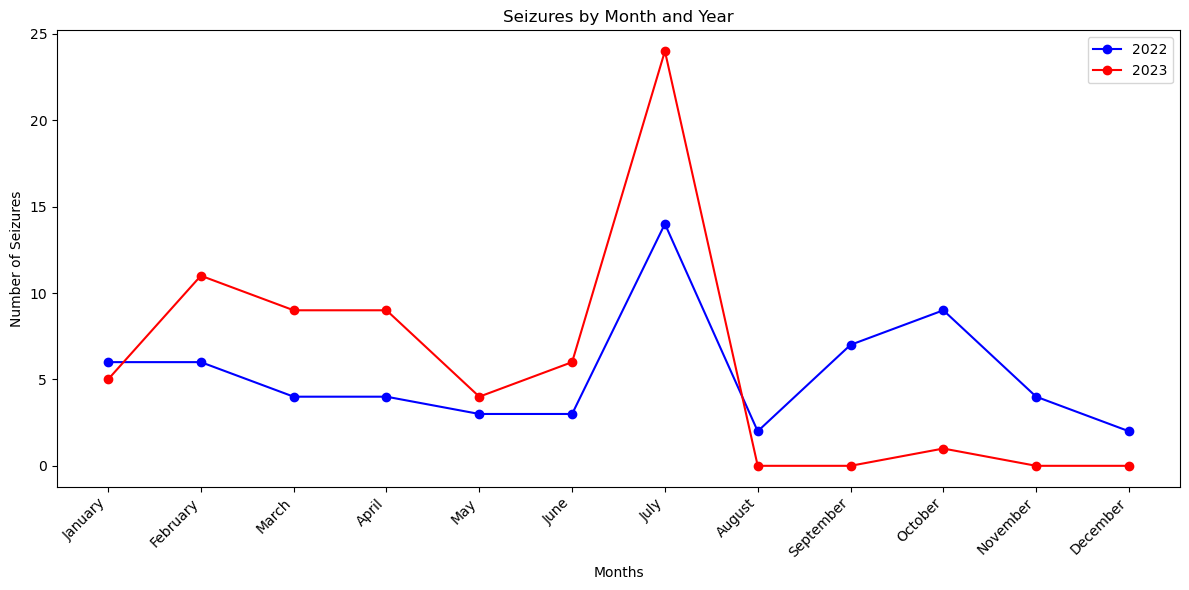

In [179]:
# Create a line chart
plt.figure(figsize=(12, 6))
# Plot line for 2022
plt.plot(custom_order, seizures_2022, marker='o', label='2022', color='blue')
# Plot line for 2023
plt.plot(custom_order, seizures_2023, marker='o', label='2023', color='red')

plt.xlabel('Months')
plt.ylabel('Number of Seizures')
plt.title('Seizures by Month and Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

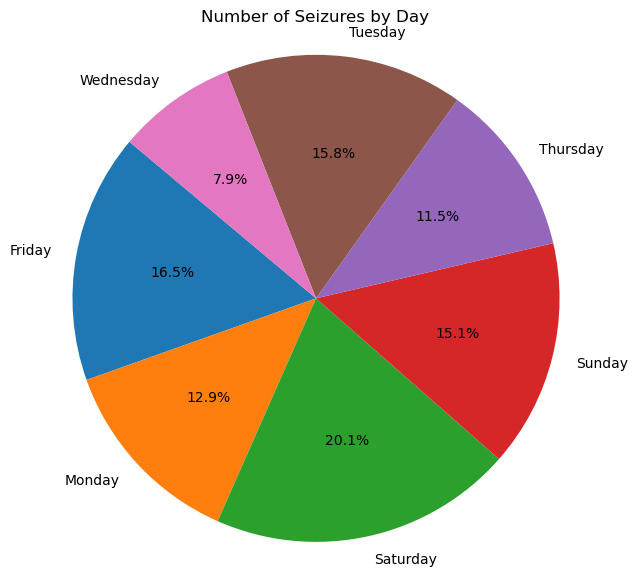

In [182]:
# Group data by 'Day' and calculate the number of seizures for each day
seizures_by_day = df_filled.groupby('Day')['Number of seasures'].sum()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(seizures_by_day, labels=seizures_by_day.index, autopct='%1.1f%%', startangle=140)

plt.title('Number of Seizures by Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [239]:
# Remove non-numeric characters from the 'TOS' column
df_filled['TOS'] = df_filled['TOS'].str.replace(r'[^\d:]', '', regex=True)

# Replace empty strings with NaN
df_filled['TOS'] = df_filled['TOS'].replace('', np.nan)

# Convert the 'TOS' column to datetime type (you can use timedelta if needed)
df_filled['TOS'] = pd.to_datetime(df_filled['TOS'], format='%H:%M', errors='coerce')

print(df_filled['TOS'])

0                     NaT
1                     NaT
2                     NaT
3                     NaT
4                     NaT
              ...        
135   1900-01-01 11:42:00
136   1900-01-01 04:07:00
137   1900-01-01 12:23:00
138   1900-01-01 07:33:00
139   1900-01-01 08:37:00
Name: TOS, Length: 140, dtype: datetime64[ns]


In [240]:
import matplotlib.pyplot as plt

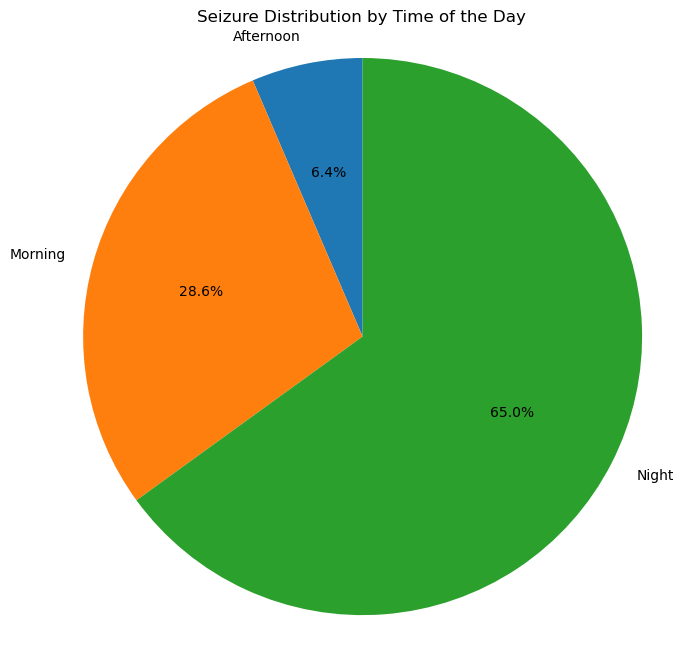

In [241]:
# Convert the 'TOS' column to time of the day categories
def categorize_time_of_day(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_filled['Time of the Day'] = df_filled['TOS'].apply(categorize_time_of_day)

# Group data by 'Time of the Day' and calculate the number of seizures in each category
seizure_counts = df_filled.groupby('Time of the Day')['Number of seasures'].sum()

# Create a pie chart to visualize the distribution of seizures across different time periods
plt.figure(figsize=(8, 8))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Seizure Distribution by Time of the Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

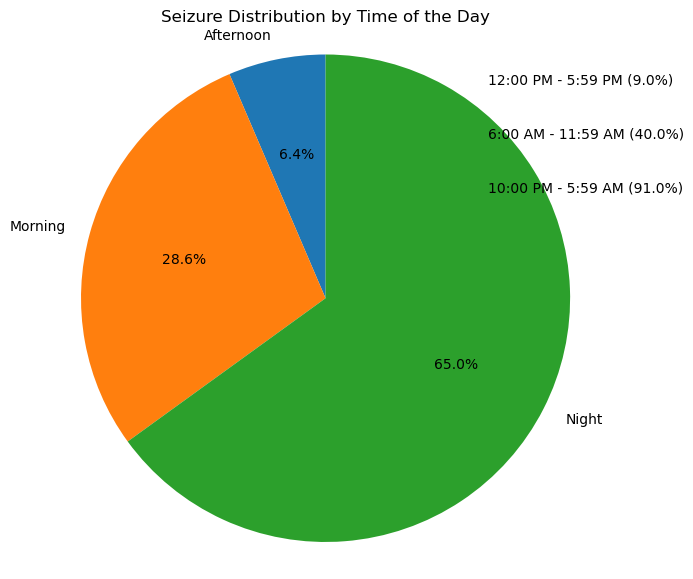

In [243]:
# Convert the 'TOS' column to time of the day categories
def categorize_time_of_day(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_filled['Time of the Day'] = df_filled['TOS'].apply(categorize_time_of_day)

# Calculate the start and end times for each time of the day category
time_frames = {
    'Morning': '6:00 AM - 11:59 AM',
    'Afternoon': '12:00 PM - 5:59 PM',
    'Evening': '6:00 PM - 9:59 PM',
    'Night': '10:00 PM - 5:59 AM'
}

# Group data by 'Time of the Day' and calculate the number of seizures in each category
seizure_counts = df_filled.groupby('Time of the Day')['Number of seasures'].sum()

# Create a pie chart to visualize the distribution of seizures across different time periods
plt.figure(figsize=(7, 7))
plt.pie(seizure_counts, labels=seizure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Seizure Distribution by Time of the Day')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add custom labels to the pie chart segments with time frames
for i, category in enumerate(seizure_counts.index):
    plt.text(0.8, 0.9 - i * 0.1, f'{time_frames[category]} ({seizure_counts[category]:.1f}%)',
             transform=plt.gca().transAxes, fontsize=10, ha='left')

plt.show()

# Statistica Analysis

Are there any patterns or trends in the occurrence of seizures over time? 

In [262]:
from scipy import stats

# Assume 'df_filled' is your DataFrame containing the data
month_seizures = df_filled.groupby('Month')['Number of seasures'].sum()

# Split the data into two groups (e.g., first half and second half of the year)
first_half = month_seizures[:6]
second_half = month_seizures[6:]

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(first_half, second_half)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.3524483535979221
P-Value: 0.20602157258358794


    In this case, the p-value is approximately 0.206. This means that there is a 20.6% chance of observing the observed difference in the occurrence of seizures between the two time periods (e.g., first half and second half of the year) by random chance alone, assuming that there is no true difference between the groups.

    Since the p-value (0.206) is greater than the chosen significance level (alpha), which is commonly set to 0.05 (5%), we fail to reject the null hypothesis (H0). In other words, the results do not provide enough evidence to claim that there is a significant difference in the occurrence of seizures between the two time periods.

    The lack of statistical significance in this context suggests that the observed difference in the number of seizures between the first half and second half of the year is likely due to random variation or noise rather than a true underlying difference.

Is tere a corelation between length of seasures and time of the day?

    F-Statistic: The F-statistic is a test statistic that measures the ratio of variance between the groups and variance within the groups. A larger F-statistic indicates a larger difference between the group means relative to the variation within the groups.

    P-Value: The p-value is the probability of obtaining the observed F-statistic (or a more extreme value) if the null hypothesis is true. In this case, the null hypothesis is that there is no difference in the mean 'Length in(seconds)' across different time periods (Time of the Day). A small p-value (typically less than the significance level, commonly 0.05) suggests that there is strong evidence against the null hypothesis, indicating that at least one group mean is significantly different from the others.

In [263]:
from scipy.stats import f_oneway

# Assuming df_filled is your DataFrame with the relevant columns

# Filter the data to include only the necessary columns
data_for_anova = df_filled[['Length in(seconds)', 'Time of the Day']]

# Perform ANOVA
grouped_data = data_for_anova.groupby('Time of the Day')['Length in(seconds)']
anova_result = f_oneway(*[group.values for name, group in grouped_data])

# Extract results
f_statistic = anova_result.statistic
p_value = anova_result.pvalue

# Print results
print("ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

ANOVA Results:
F-Statistic: 4.462459069316865
P-Value: 0.03644873899344749


F-Statistic: The F-statistic is a measure of the variation between groups relative to the variation within groups. In ANOVA, a larger F-statistic suggests that there is more variation between the groups compared to the variation within the groups. It is used to test whether there are significant differences in the means of the groups being compared. In this case, the F-statistic is 4.462459069316865.

P-Value: The p-value is the probability of obtaining results as extreme as the observed results, assuming that the null hypothesis is true. In ANOVA, a small p-value (typically below the chosen significance level, often 0.05) suggests that the group means are significantly different, and the null hypothesis (which assumes no significant difference between groups) can be rejected. In this case, the p-value is 0.03644873899344749, which is less than 0.05.

Overall, the ANOVA results indicate that there is a statistically significant difference in the means of the groups being compared. The small p-value (0.036) suggests that there is evidence to reject the null hypothesis and conclude that at least one of the groups has a different mean compared to the others.

In [264]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df_filled is your DataFrame with the relevant columns
data_for_chi2 = df_filled[['Time of the Day', 'extra note']]

# Create a contingency table
contingency_table = pd.crosstab(data_for_chi2['Time of the Day'], data_for_chi2['extra note'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Test Results:")
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-square Test Results:
Chi-square Statistic: 34.74056753833429
P-Value: 0.38498323087490344
Degrees of Freedom: 33


    Chi-square Statistic: The Chi-square statistic is a measure of the difference between the expected and observed frequencies in a contingency table. In this context, it is used to determine whether there is a relationship between the variables being analyzed (time of the day and the presence of an extra note). Higher values of the Chi-square statistic indicate a larger discrepancy between the observed and expected frequencies, which may suggest a potential relationship between the variables.

    P-Value: The p-value is the probability of obtaining results as extreme as the observed results, assuming that there is no relationship between the variables (i.e., the null hypothesis is true). A small p-value (typically below the chosen significance level, often 0.05) suggests that the observed relationship is statistically significant, and the null hypothesis can be rejected. However, in this case, the p-value is 0.38498323087490344, which is greater than 0.05.

    Degrees of Freedom: The degrees of freedom represent the number of values in the final calculation of a statistic that are free to vary. In the context of the Chi-square test for independence, the degrees of freedom are determined by the number of rows and columns in the contingency table. In this case, the degrees of freedom are 33, which corresponds to (number of rows - 1) * (number of columns - 1).

Based on the results, the p-value is greater than the significance level (e.g., 0.05), indicating that there is insufficient evidence to reject the null hypothesis. The null hypothesis in this case would be that there is no relationship between the time of the day and the presence of an extra note. Therefore, the data does not provide enough evidence to conclude that there is a statistically significant relationship between these two variables.

In summary, the Chi-square test results suggest that there is no significant relationship between the time of the day and the presence of an extra note in your data

# SUMMARY

We found that there are seasures in different times of the day, some days like Friday, Saturday and Tuesday are 
having more seasures and months like July and in March seasures are most likely to ocuur. 
To define if there is a relationships between seasures and time of the day or lenght over time of the day or type of 
a seasure over time of the day we need more data. 